In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('2010-2020 train.xlsx')
df

,행정구역(시도),행정구역(시군구),연도,총인구수(명),유치원 수,초등학교 수,출생건수,사망건수,혼인건수,이혼건수,학령인구(명),총인구수-학령인구(명),행정구역
0,강원특별자치도,횡성군,2010,44254,15,16,280,410,201,94,7229,37025,강원특별자치도 횡성군
1,강원특별자치도,횡성군,2011,44360,14,16,247,439,179,117,7154,37206,강원특별자치도 횡성군
2,강원특별자치도,횡성군,2012,44615,14,16,261,431,194,87,6942,37673,강원특별자치도 횡성군
3,강원특별자치도,횡성군,2013,44937,14,16,204,450,194,90,6765,38172,강원특별자치도 횡성군
4,강원특별자치도,횡성군,2014,45373,13,16,207,480,211,107,6648,38725,강원특별자치도 횡성군
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448,경기도,가평군,2016,62448,16,13,363,608,269,143,8599,53849,경기도 가평군
2449,경기도,가평군,2017,62973,16,13,362,605,269,147,8367,54606,경기도 가평군
2450,경기도,가평군,2018,62918,15,13,301,662,244,177,8094,54824,경기도 가평군
2451,경기도,가평군,2019,62415,14,13,261,642,272,139,7755,54660,경기도 가평군


In [3]:
df = df.drop((["행정구역(시도)","총인구수-학령인구(명)","행정구역","행정구역(시군구)","유치원 수","출생건수","혼인건수","연도","초등학교 수","사망건수","이혼건수"]), axis=1)
df

,총인구수(명),학령인구(명)
0,44254,7229
1,44360,7154
2,44615,6942
3,44937,6765
4,45373,6648
...,...,...
2448,62448,8599
2449,62973,8367
2450,62918,8094
2451,62415,7755


In [4]:
chunk_size = 11
chunks = [df.iloc[i:i+chunk_size] for i in range(0, len(df), chunk_size)]

# 결과 확인
for chunk in chunks:
    print(chunk)
    print("\n" + "="*40 + "\n")

    총인구수(명)  학령인구(명)
0     44254     7229
1     44360     7154
2     44615     6942
3     44937     6765
4     45373     6648
5     45777     6588
6     45991     6353
7     46281     6188
8     46726     5941
9     46575     5679
10    46472     5394


    총인구수(명)  학령인구(명)
11    24364     3981
12    24945     3986
13    25020     3953
14    25079     3936
15    27143     4205
16    27020     3906
17    26264     3569
18    26022     3493
19    25084     3266
20    24917     3195
21    24857     3077


    총인구수(명)  학령인구(명)
22    69368    13064
23    68985    12923
24    68378    12621
25    67829    12387
26    66772    11834
27    65848    11359
28    65303    10920
29    64680    10502
30    63933     9989
31    62737     9401
32    62522     8984


    총인구수(명)  학령인구(명)
33   505838   102533
34   516765   104856
35   525490   107298
36   530251   109618
37   540862   112051
38   596525   121415
39   640890   128503
40   691086   136096
41   758722   147357
42   815396   156241
43   85

In [5]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler

target_column = '총인구수(명)'

# Split the data into chunks
chunk_size = 11
chunks = [df[i:i+chunk_size] for i in range(0, len(df), chunk_size)]

# 기존 값들을 저장할 딕셔너리
original_values = {}

# 예측 결과를 저장할 딕셔너리
predicted_values = {}

# 새로운 열을 추가할 딕셔너리
new_column_values = {}

for i, chunk in enumerate(chunks):
    print(f"Processing Chunk {i + 1}")

    # 각 chunk에서 선택한 열의 데이터 가져오기 (마지막 행 제외)
    column_data = chunk[target_column].tolist()[:-1]

    # 기존 값들을 저장
    key = f"{target_column}_Chunk{i + 1}_Original"
    original_values[key] = column_data

    # 학습 데이터
    train_data = np.array(column_data)

    # Fit ARIMA model
    order = (1, 1, 1)  # Example order, you may need to tune this
    model = ARIMA(train_data, order=order)
    fitted_model = model.fit()

    # Forecast the next value
    next_value = fitted_model.forecast(steps=1)

    # Append the forecasted value to the original data
    column_data += [next_value[0]]
    predicted_values[key] = column_data

    # 새로운 열을 추가할 딕셔너리에 저장
    new_column_values[key] = predicted_values[key]

# 예측 결과 및 기존 값 출력
for key, values in predicted_values.items():
    print(f"{key} Values with Prediction:")
    print(values)
    print("=" * 40)

# 새로운 열을 추가한 값 출력
for key, value in new_column_values.items():
    print(f"{key} New Column Value:")
    print(value)
    print("=" * 40)

Processing Chunk 1
Processing Chunk 2
Processing Chunk 3
Processing Chunk 4


C:\Users\Ahn\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ahn\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Processing Chunk 5
Processing Chunk 6
Processing Chunk 7
Processing Chunk 8
Processing Chunk 9
Processing Chunk 10
Processing Chunk 11
Processing Chunk 12
Processing Chunk 13
Processing Chunk 14


C:\Users\Ahn\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ahn\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Processing Chunk 15
Processing Chunk 16
Processing Chunk 17
Processing Chunk 18
Processing Chunk 19
Processing Chunk 20
Processing Chunk 21
Processing Chunk 22
Processing Chunk 23
Processing Chunk 24
Processing Chunk 25
Processing Chunk 26
Processing Chunk 27
Processing Chunk 28
Processing Chunk 29
Processing Chunk 30
Processing Chunk 31


C:\Users\Ahn\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ahn\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Processing Chunk 32
Processing Chunk 33
Processing Chunk 34
Processing Chunk 35
Processing Chunk 36
Processing Chunk 37
Processing Chunk 38
Processing Chunk 39
Processing Chunk 40
Processing Chunk 41
Processing Chunk 42


C:\Users\Ahn\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ahn\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Processing Chunk 43
Processing Chunk 44
Processing Chunk 45
Processing Chunk 46
Processing Chunk 47
Processing Chunk 48


C:\Users\Ahn\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Processing Chunk 49
Processing Chunk 50
Processing Chunk 51
Processing Chunk 52
Processing Chunk 53
Processing Chunk 54
Processing Chunk 55
Processing Chunk 56
Processing Chunk 57
Processing Chunk 58


C:\Users\Ahn\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Processing Chunk 59
Processing Chunk 60
Processing Chunk 61
Processing Chunk 62


C:\Users\Ahn\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Processing Chunk 63
Processing Chunk 64
Processing Chunk 65
Processing Chunk 66
Processing Chunk 67
Processing Chunk 68


C:\Users\Ahn\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ahn\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Processing Chunk 69
Processing Chunk 70
Processing Chunk 71
Processing Chunk 72
Processing Chunk 73
Processing Chunk 74
Processing Chunk 75
Processing Chunk 76
Processing Chunk 77
Processing Chunk 78
Processing Chunk 79
Processing Chunk 80
Processing Chunk 81
Processing Chunk 82
Processing Chunk 83
Processing Chunk 84
Processing Chunk 85
Processing Chunk 86
Processing Chunk 87
Processing Chunk 88
Processing Chunk 89
Processing Chunk 90
Processing Chunk 91


C:\Users\Ahn\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Processing Chunk 92
Processing Chunk 93
Processing Chunk 94
Processing Chunk 95
Processing Chunk 96
Processing Chunk 97


C:\Users\Ahn\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ahn\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Processing Chunk 98
Processing Chunk 99
Processing Chunk 100
Processing Chunk 101
Processing Chunk 102
Processing Chunk 103
Processing Chunk 104
Processing Chunk 105
Processing Chunk 106
Processing Chunk 107
Processing Chunk 108


C:\Users\Ahn\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Processing Chunk 109
Processing Chunk 110
Processing Chunk 111
Processing Chunk 112
Processing Chunk 113
Processing Chunk 114


C:\Users\Ahn\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Processing Chunk 115
Processing Chunk 116
Processing Chunk 117
Processing Chunk 118
Processing Chunk 119
Processing Chunk 120


C:\Users\Ahn\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ahn\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Processing Chunk 121
Processing Chunk 122
Processing Chunk 123
Processing Chunk 124
Processing Chunk 125


C:\Users\Ahn\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ahn\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ahn\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Processing Chunk 126
Processing Chunk 127
Processing Chunk 128
Processing Chunk 129


C:\Users\Ahn\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ahn\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ahn\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Processing Chunk 130
Processing Chunk 131
Processing Chunk 132
Processing Chunk 133


C:\Users\Ahn\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Processing Chunk 134
Processing Chunk 135
Processing Chunk 136
Processing Chunk 137
Processing Chunk 138


C:\Users\Ahn\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ahn\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Processing Chunk 139
Processing Chunk 140
Processing Chunk 141
Processing Chunk 142
Processing Chunk 143
Processing Chunk 144
Processing Chunk 145
Processing Chunk 146
Processing Chunk 147
Processing Chunk 148
Processing Chunk 149
Processing Chunk 150
Processing Chunk 151


C:\Users\Ahn\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Processing Chunk 152
Processing Chunk 153
Processing Chunk 154
Processing Chunk 155
Processing Chunk 156
Processing Chunk 157
Processing Chunk 158
Processing Chunk 159
Processing Chunk 160
Processing Chunk 161
Processing Chunk 162
Processing Chunk 163


C:\Users\Ahn\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ahn\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ahn\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Processing Chunk 164
Processing Chunk 165
Processing Chunk 166
Processing Chunk 167
Processing Chunk 168


C:\Users\Ahn\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Processing Chunk 169
Processing Chunk 170
Processing Chunk 171
Processing Chunk 172
Processing Chunk 173
Processing Chunk 174


C:\Users\Ahn\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Processing Chunk 175
Processing Chunk 176
Processing Chunk 177


C:\Users\Ahn\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Processing Chunk 178
Processing Chunk 179
Processing Chunk 180
Processing Chunk 181
Processing Chunk 182
Processing Chunk 183


C:\Users\Ahn\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Processing Chunk 184
Processing Chunk 185
Processing Chunk 186
Processing Chunk 187
Processing Chunk 188
Processing Chunk 189
Processing Chunk 190
Processing Chunk 191
Processing Chunk 192
Processing Chunk 193
Processing Chunk 194
Processing Chunk 195


C:\Users\Ahn\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ahn\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Processing Chunk 196
Processing Chunk 197
Processing Chunk 198
Processing Chunk 199
Processing Chunk 200
Processing Chunk 201
Processing Chunk 202
Processing Chunk 203
Processing Chunk 204
Processing Chunk 205
Processing Chunk 206
Processing Chunk 207
Processing Chunk 208
Processing Chunk 209
Processing Chunk 210
Processing Chunk 211
Processing Chunk 212
Processing Chunk 213


C:\Users\Ahn\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ahn\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Processing Chunk 214
Processing Chunk 215
Processing Chunk 216
Processing Chunk 217
Processing Chunk 218


C:\Users\Ahn\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Processing Chunk 219
Processing Chunk 220
Processing Chunk 221
Processing Chunk 222
Processing Chunk 223
총인구수(명)_Chunk1_Original Values with Prediction:
[44254, 44360, 44615, 44937, 45373, 45777, 45991, 46281, 46726, 46575, 46790.44286667357]
총인구수(명)_Chunk2_Original Values with Prediction:
[24364, 24945, 25020, 25079, 27143, 27020, 26264, 26022, 25084, 24917, 24878.75799102731]
총인구수(명)_Chunk3_Original Values with Prediction:
[69368, 68985, 68378, 67829, 66772, 65848, 65303, 64680, 63933, 62737, 62518.74970803776]
총인구수(명)_Chunk4_Original Values with Prediction:
[505838, 516765, 525490, 530251, 540862, 596525, 640890, 691086, 758722, 815396, 849389.7460268564]
총인구수(명)_Chunk5_Original Values with Prediction:
[69893, 69899, 69727, 70638, 70451, 70336, 70076, 70340, 69949, 69150, 69144.31735462772]
총인구수(명)_Chunk6_Original Values with Prediction:
[88078, 88108, 88415, 89704, 91866, 94553, 99971, 101570, 101082, 100423, 101771.070616387]
총인구수(명)_Chunk7_Original Values with Prediction:
[426729

C:\Users\Ahn\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [6]:
df2 = pd.read_excel('2021 test.xlsx')
df2 = df2.drop((["행정구역(시도)","총인구수-학령인구(명)","행정구역","행정구역(시군구)","유치원 수","출생건수","혼인건수","연도","초등학교 수","사망건수","이혼건수"]), axis=1)
df2

,총인구수(명),학령인구(명)
0,46481,5172
1,24195,2976
2,62624,8715
3,887015,168011
4,68365,7881
...,...,...
218,299182,34250
219,212965,29754
220,462664,64482
221,533042,90527


총인구수(명)_Chunk1_Original Last Value with Prediction:
46790.44286667357
총인구수(명)_Chunk2_Original Last Value with Prediction:
24878.75799102731
총인구수(명)_Chunk3_Original Last Value with Prediction:
62518.74970803776
총인구수(명)_Chunk4_Original Last Value with Prediction:
849389.7460268564
총인구수(명)_Chunk5_Original Last Value with Prediction:
69144.31735462772
총인구수(명)_Chunk6_Original Last Value with Prediction:
101771.070616387
총인구수(명)_Chunk7_Original Last Value with Prediction:
404044.7146628868
총인구수(명)_Chunk8_Original Last Value with Prediction:
70548.83629038071
총인구수(명)_Chunk9_Original Last Value with Prediction:
44986.95215776912
총인구수(명)_Chunk10_Original Last Value with Prediction:
32890.85483750712
총인구수(명)_Chunk11_Original Last Value with Prediction:
39636.93127753748
총인구수(명)_Chunk12_Original Last Value with Prediction:
65567.0314383943
총인구수(명)_Chunk13_Original Last Value with Prediction:
46476.46763094675
총인구수(명)_Chunk14_Original Last Value with Prediction:
285544.2905128288
총인구수(명)_Chunk15_O

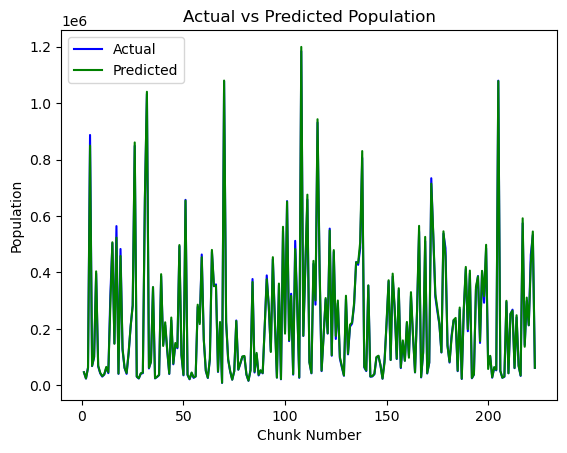

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Lists to store the chunk numbers and corresponding last values with predictions
chunk_numbers_last_value = []
last_values_with_predictions = []

# 새로운 열을 추가한 값 출력
for i, (key, values) in enumerate(predicted_values.items()):
    print(f"{key} Last Value with Prediction:")
    print(values[-1])
    print("=" * 40)

    # Append the chunk number to the list
    chunk_numbers_last_value.append(i + 1)

    # Append the last value with prediction to the list
    last_values_with_predictions.append(values[-1])

# '총인구수(명)' 열이 df2에 있는지 확인
if '총인구수(명)' in df2.columns:
    # '총인구수(명)' 열의 데이터 가져오기
    actual_values_df2 = df2['총인구수(명)']

    # Check for missing values
    if actual_values_df2.isnull().sum() > 0:
        print("Warning: '총인구수(명)' column in df2 contains missing values.")

    # Check data types
    if actual_values_df2.dtype != np.number:
        print("Warning: '총인구수(명)' column in df2 is not of numeric data type.")

    # Convert to NumPy array
    actual_values_array_df2 = actual_values_df2.to_numpy()

    # Ensure that the lengths match
    min_length = min(len(actual_values_array_df2), len(last_values_with_predictions))

    # Plot the values
    plt.plot(chunk_numbers_last_value[:min_length], actual_values_array_df2[:min_length], linestyle='-', color='b', label='Actual')
    plt.plot(chunk_numbers_last_value[:min_length], last_values_with_predictions[:min_length],  linestyle='-', color='g', label='Predicted')

    # Calculate MAPE
    mape_score_df2 = np.mean(np.abs((actual_values_array_df2[:min_length] - np.array(last_values_with_predictions[:min_length])) / actual_values_array_df2[:min_length])) * 100

    # Print the MAPE Score
    print("=" * 40)
    print(f"MAPE Score for '총인구수(명)' in df2: {mape_score_df2:.2f}%")

    # Add labels and legend
    plt.xlabel('Chunk Number')
    plt.ylabel('Population')
    plt.title('Actual vs Predicted Population')
    plt.legend()

    # Show the plot
    plt.show()
else:
    print("'총인구수(명)' column not found in df2.")